In [1]:
import os
import evautils
from evautils import mommadragonnutils
from evautils import dirutils
from evautils import osutils
from evautils import match_gc_content

In [2]:
REGION_SIZE = 400
CELL_LINE = 'H1ESC'
POS_PREFIX = CELL_LINE +'_' + str(REGION_SIZE)
NEG_PREFIX = 'universal_dnase_' + str(REGION_SIZE)
MASTER_DIR='/users/eprakash/benchmarking/H1ESC/400bp_hg38'
TRAINING_BASE_DIR=MASTER_DIR+'/training'
PREPROCESSING_BASE_DIR = MASTER_DIR+'/preprocessing'
MOMMA_DRAGONN='/users/eprakash/template'
WEIGHTFILE='/users/eprakash/projects/benchmarking/newdata/H1ESC/models/deepseabeluga/adaptDeepSeaKerasModel.H1ESC.h5'
IMPLANTED_POS_BED_FILE = PREPROCESSING_BASE_DIR + '/' + 'implanted_' + POS_PREFIX + '.bed.gz'
MATCHED_NEG_BED_FILE = PREPROCESSING_BASE_DIR + '/' + 'matched_' + 'no_' + CELL_LINE + '_' + NEG_PREFIX + '.bed.gz'

In [3]:
dirutils.copyDir(MOMMA_DRAGONN, TRAINING_BASE_DIR)
os.system('cp ' + WEIGHTFILE + ' ' + TRAINING_BASE_DIR)
MOMMA_DRAGONN=TRAINING_BASE_DIR+'/'+'momma_dragonn'

In [4]:
mommadragonnutils.splitDatasets(IMPLANTED_POS_BED_FILE, MATCHED_NEG_BED_FILE, TRAINING_BASE_DIR+'/'+POS_PREFIX, TRAINING_BASE_DIR+'/'+NEG_PREFIX)

#Loading /users/eprakash/benchmarking/H1ESC/400bp_hg38/preprocessing/implanted_H1ESC_400.bed.gz ...
#Loaded 96663 sequences from /users/eprakash/benchmarking/H1ESC/400bp_hg38/preprocessing/implanted_H1ESC_400.bed.gz
#Loading /users/eprakash/benchmarking/H1ESC/400bp_hg38/preprocessing/matched_no_H1ESC_universal_dnase_400.bed.gz ...
#Loaded 96663 sequences from /users/eprakash/benchmarking/H1ESC/400bp_hg38/preprocessing/matched_no_H1ESC_universal_dnase_400.bed.gz
TOTAL POS: 96663
TOTAL NEG: 96663
POS TRAIN: 77331.0
NEG TRAIN: 77331.0
POS VALID: 19332.0
NEG VALID: 19332.0


#Loading /users/eprakash/benchmarking/H1ESC/400bp_hg38/training/H1ESC_400_train.bed.gz ...
#Loaded 77331 sequences from /users/eprakash/benchmarking/H1ESC/400bp_hg38/training/H1ESC_400_train.bed.gz
#Loading /users/eprakash/benchmarking/H1ESC/400bp_hg38/training/universal_dnase_400_train.bed.gz ...
#Loaded 77331 sequences from /users/eprakash/benchmarking/H1ESC/400bp_hg38/training/universal_dnase_400_train.bed.gz


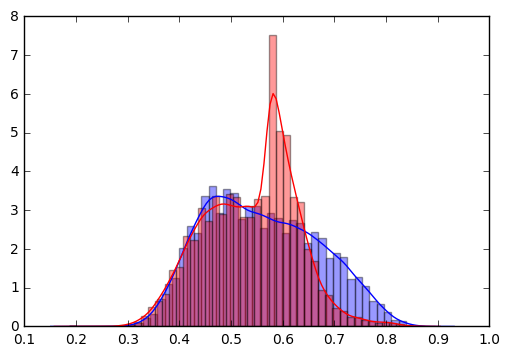

#Loading /users/eprakash/benchmarking/H1ESC/400bp_hg38/training/H1ESC_400_valid.bed.gz ...
#Loaded 19331 sequences from /users/eprakash/benchmarking/H1ESC/400bp_hg38/training/H1ESC_400_valid.bed.gz
#Loading /users/eprakash/benchmarking/H1ESC/400bp_hg38/training/universal_dnase_400_valid.bed.gz ...
#Loaded 19331 sequences from /users/eprakash/benchmarking/H1ESC/400bp_hg38/training/universal_dnase_400_valid.bed.gz


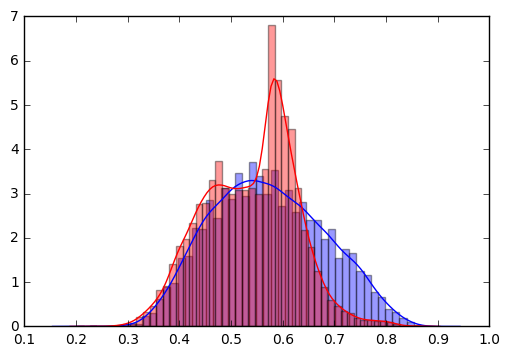

In [5]:
match_gc_content.gc_sanity_check(TRAINING_BASE_DIR+'/'+POS_PREFIX+'_train.bed.gz', TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_train.bed.gz')
match_gc_content.gc_sanity_check(TRAINING_BASE_DIR+'/'+POS_PREFIX+'_valid.bed.gz', TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_valid.bed.gz')

In [6]:
mommadragonnutils.fillPlaceholders(MOMMA_DRAGONN+'/examples/fasta_sequential_model/config/hyperparameter_configs_list.yaml',
                                   WEIGHTFILE,
                                   TRAINING_BASE_DIR+'/'+POS_PREFIX+'_train.bed.gz',
                                   TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_train.bed.gz',
                                   TRAINING_BASE_DIR+'/'+POS_PREFIX+'_valid.bed.gz',
                                   TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_valid.bed.gz')

In [7]:
mommadragonnutils.fillPlaceholders(MOMMA_DRAGONN+'/examples/fasta_sequential_model/config/valid_data_loader_config.yaml',
                                   WEIGHTFILE,
                                   TRAINING_BASE_DIR+'/'+POS_PREFIX+'_train.bed.gz',
                                   TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_train.bed.gz',
                                   TRAINING_BASE_DIR+'/'+POS_PREFIX+'_valid.bed.gz',
                                   TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_valid.bed.gz')

In [10]:
md=MOMMA_DRAGONN+'/examples/fasta_sequential_model'
mommadragonnutils.runMD(md)

Using TensorFlow backend.
2020-01-01 00:25:25.458076: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-01-01 00:25:25.689500: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1405] Found device 0 with properties:
name: GeForce GTX TITAN X major: 5 minor: 2 memoryClockRate(GHz): 1.076
pciBusID: 0000:09:00.0
totalMemory: 11.93GiB freeMemory: 11.48GiB
2020-01-01 00:25:25.689542: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1484] Adding visible gpu devices: 0
2020-01-01 00:25:26.252276: I tensorflow/core/common_runtime/gpu/gpu_device.cc:965] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-01-01 00:25:26.252323: I tensorflow/core/common_runtime/gpu/gpu_device.cc:971]      0
2020-01-01 00:25:26.252335: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] 0:   N
2020-01-01 00:25:26.253509: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1097] Created TensorF